In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Loan_recommend.csv")

In [3]:
dftemp = pd.DataFrame()


It is important to convert the data into a canonical format. We would like to consider data for only those users for this recommendation engine who have taken at least 3 loans and serviced them to completion. Also, we would form data for only those Loan-IDs that have been given at least 5 times. This will ensure that we are working with some amount of data in the system and our recommendation will not be plagued with cold-start problem for our machine model and also, we have some active valid interactions as the basis for this intelligence that we are building.

In [4]:
df = df[df["Num_Of_Loans_Paid__c"]>3]
df = df[df["Number_Of_Loans_Granted__c"]>5]

In [33]:
df.describe()

,Min_IT_Loan_ID__c,Opp_Number__c,Number_Of_Loans_Granted__c,Num_Of_Loans_Paid__c,Total_Repayments__c,Amount,Term_in_Weeks__c,userId,loanId,count
count,4.698000e+03,4.698000e+03,4698.000000,4698.000000,4698.000000,4698.000000,4698.000000,4698.000000,4698.000000,4698.000000
mean,1.980535e+06,5.321052e+06,23.088123,19.997871,10.161132,1384.631758,14.907436,1453.475309,2293.499361,1.626011
std,1.832484e+06,1.012973e+06,12.737650,12.226222,5.827610,1072.607369,6.021376,828.391632,1324.847996,0.842493
min,7.672710e+05,3.817099e+06,6.000000,4.000000,2.000000,200.000000,4.571000,1.000000,1.000000,0.000000
25%,8.429708e+05,4.376282e+06,10.000000,7.000000,7.000000,500.000000,10.571000,737.250000,1145.250000,1.000000
50%,1.020744e+06,4.956112e+06,27.000000,23.000000,8.000000,1000.000000,14.143000,1472.500000,2289.500000,1.000000
75%,1.066891e+06,6.474900e+06,32.000000,29.000000,14.000000,2050.000000,16.143000,2164.000000,3440.750000,2.000000
max,5.175861e+06,7.395202e+06,73.000000,71.000000,40.000000,5000.000000,66.857000,2880.000000,4594.000000,6.000000


In [5]:
df.isnull().sum()

Contact__c                    0
Min_IT_Loan_ID__c             0
Opp_Number__c                 0
Id                            0
AccountID                     0
Number_Of_Loans_Granted__c    0
Num_Of_Loans_Paid__c          0
Purpose_of_Loan__c            0
Total_Repayments__c           0
Amount                        0
Term_in_Weeks__c              0
Payment_Frequency__c          0
StageName                     0
dtype: int64

In [6]:
# filling NA values with its mean 

df['Total_Repayments__c'].fillna(value=df['Total_Repayments__c'].mean(), inplace=True)

In [7]:
AccountMapperobj = {ele: count for count, ele in enumerate(set(df['AccountID']), 1) }
LoanMapperobj = {ele: count for count, ele in enumerate(set(df['Id']), 1) }

In [8]:
accId,accindex = [],[]
[(accId.append(key),accindex.append(val)) for key,val in AccountMapperobj.items()]
AccountMapperDf = pd.DataFrame({"accountId":accId,
                                "accountIndex":accindex})

In [9]:
import os
# File path
file_path = "AccountMapperDf.csv"

# Check if the file exists
if os.path.exists(file_path):
    # Delete the existing file
    os.remove(file_path)
    print(f"File '{file_path}' deleted.")

AccountMapperDf.to_csv(file_path,index=False)

print(f"New file '{file_path}' created.")

File 'AccountMapperDf.csv' deleted.
New file 'AccountMapperDf.csv' created.


In [10]:
df['userId'] = df['AccountID'].map(AccountMapperobj)
df['loanId'] = df['Id'].map(LoanMapperobj)

In [11]:
df.head(10)

,Contact__c,Min_IT_Loan_ID__c,Opp_Number__c,Id,AccountID,Number_Of_Loans_Granted__c,Num_Of_Loans_Paid__c,Purpose_of_Loan__c,Total_Repayments__c,Amount,Term_in_Weeks__c,Payment_Frequency__c,StageName,userId,loanId
0,0032x00000d2Py7AAE,835652,4434431,0062x00000D2E3CAAV,0012x00000SIDYKAA5,10,4.0,Living Expenses,7,200,13.857,Fortnightly,Loan Paid,2123,2897
1497,0032x00000U1vcRAAR,843655,4507293,0062x00000D7wReAAJ,0012x00000dbzMmAAI,12,5.0,Medical Expenses,5,300,10.000,Fortnightly,Loan Paid,2560,2
1587,0032x00000U1DnVAAV,831751,4400020,0062x00000D1c1IAAR,0012x00000dAVT5AAO,13,6.0,Vehicle Expenses,16,5000,16.143,Weekly,Loan Paid,841,747
1588,0032x00000U1DnVAAV,838701,4464122,0062x00000D71SmAAJ,0012x00000dAVT5AAO,13,7.0,Medical Expenses,16,5000,15.857,Weekly,Loan Paid,841,518
1684,0032x00000TTqjTAAT,846608,4535022,0062x00000D8TpPAAV,0012x00000cLrzcAAC,8,4.0,Vehicle Expenses,10,1000,10.429,Weekly,Loan Paid,1101,2967
1724,0032x00000TTepWAAT,5147349,4472671,0062x00000D7DwRAAV,0012x00000cL1gEAAS,6,4.0,Medical Expenses,5,500,9.857,Fortnightly,Loan Paid,302,4018
1731,0032x00000TTarXAAT,5146415,4417727,0062x00000D1ul3AAB,0012x00000cKw95AAC,7,4.0,Furniture or Appliances,7,600,13.000,Fortnightly,Loan Paid,2198,2312
1740,0032x00000TTY7BAAX,840683,4478475,0062x00000D7KD5AAN,0012x00000cKtUeAAK,15,6.0,Living Expenses,14,1000,13.714,Weekly,Loan Paid,1609,1696
1757,0032x00000TTP0XAAX,5149468,4575098,0062x00000D9Hp4AAF,0012x00000cKXugAAG,7,4.0,Child Expenses,7,1250,12.571,Fortnightly,Loan Paid,1872,2014
1769,0032x00000TTKiBAAX,5148312,4522205,0062x00000D8EyRAAV,0012x00000cKGcjAAG,7,4.0,Home Maintenance & Repairs,6,300,5.857,Weekly,Loan Paid,499,2584



It is important to convert the data into a canonical format. We would like to consider data for only those users for this recommendation
engine who have taken at least 3 loans and serviced them to completion. Also, we would form data for only those Loan-IDs that have been 
given at least 5 times. This will ensure that we are working with some amount of data in the system and our recommendation will not be 
plagued with cold-start problem for our machine model and also, we have some active valid interactions as the basis for this intelligence 
that we are building.
Based on the above description, we can create a representation of user-loan interaction matrix using cumulative data.
Cumulative Data Option: Each cell signifying how many times it has been taken. It will be a sum total of all the successful and unsuccessful 
servicing of that specific loan. A negative number would indicate it was served unsuccessfully more than it was served successfully. So, if a
loan was taken 5 times with 4 of them being serviced successfully and 1 as unsuccessful loan then the overall count should indicate “3” in that
particular cell (Count = 1 + 1 + 1 + 1 + (-1) = 3).  We will have a “NaN” for not having been taken at all if there is no data for a specific 
user-loan interaction.

In [12]:
# Applying the Cumulative Data Option
df['count'] = (df['Num_Of_Loans_Paid__c'] - (df['Number_Of_Loans_Granted__c'] - df['Num_Of_Loans_Paid__c']))

In [21]:
Payment_Frequency_list = list(set(df['Payment_Frequency__c']))

In [15]:
createLoanRange = [(i,i+199) for i in range(1,5000,200)]

In [16]:
createLoanRange

[(1, 200),
 (201, 400),
 (401, 600),
 (601, 800),
 (801, 1000),
 (1001, 1200),
 (1201, 1400),
 (1401, 1600),
 (1601, 1800),
 (1801, 2000),
 (2001, 2200),
 (2201, 2400),
 (2401, 2600),
 (2601, 2800),
 (2801, 3000),
 (3001, 3200),
 (3201, 3400),
 (3401, 3600),
 (3601, 3800),
 (3801, 4000),
 (4001, 4200),
 (4201, 4400),
 (4401, 4600),
 (4601, 4800),
 (4801, 5000)]

In [23]:
Loan_classify_method = [
    {"Cluster" : 1,"ClusterInfo":{"MinAmount":1300,"MaxAmount":2500,"Total_repayment_min":3,"Total_repayment_max":11}},
    {"Cluster" : 2,"ClusterInfo":{"MinAmount":200,"MaxAmount":1300,"Total_repayment_min":3,"Total_repayment_max":10}},
    {"Cluster" : 3,"ClusterInfo":{"MinAmount":200,"MaxAmount":1400,"Total_repayment_min":10,"Total_repayment_max":16}},
    {"Cluster" : 4,"ClusterInfo":{"MinAmount":500,"MaxAmount":1300,"Total_repayment_min":18,"Total_repayment_max":26}},
    {"Cluster" : 5,"ClusterInfo":{"MinAmount":1500,"MaxAmount":2600,"Total_repayment_min":19,"Total_repayment_max":26}},    
    {"Cluster" : 6,"ClusterInfo":{"MinAmount":1450,"MaxAmount":2500,"Total_repayment_min":12,"Total_repayment_max":19}},
    {"Cluster" : 7,"ClusterInfo":{"MinAmount":2600,"MaxAmount":3800,"Total_repayment_min":4,"Total_repayment_max":12}},
    {"Cluster" : 8,"ClusterInfo":{"MinAmount":3950,"MaxAmount":5000,"Total_repayment_min":4,"Total_repayment_max":12}},
    {"Cluster" : 9,"ClusterInfo":{"MinAmount":2800,"MaxAmount":4000,"Total_repayment_min":13,"Total_repayment_max":18}},
    {"Cluster" : 10,"ClusterInfo":{"MinAmount":4500,"MaxAmount":5000,"Total_repayment_min":13,"Total_repayment_max":30}},
    {"Cluster" : 11,"ClusterInfo":{"MinAmount":2050,"MaxAmount":2500,"Total_repayment_min":27,"Total_repayment_max":32}},
    {"Cluster" : 12,"ClusterInfo":{"MinAmount":1700,"MaxAmount":4000,"Total_repayment_min":36,"Total_repayment_max":40}},
    {"Cluster" : 13,"ClusterInfo":{"MinAmount":2800,"MaxAmount":4000,"Total_repayment_min":20,"Total_repayment_max":24}},                       
    {"Cluster" : 14,"ClusterInfo":{"MinAmount":3000,"MaxAmount":4000,"Total_repayment_min":30,"Total_repayment_max":36}},
    {"Cluster" : 15,"ClusterInfo":{"MinAmount":600,"MaxAmount":1050,"Total_repayment_min":36,"Total_repayment_max":36}}
]

In [24]:
Loan_classify_method

[{'Cluster': 1,
  'ClusterInfo': {'MinAmount': 1300,
   'MaxAmount': 2500,
   'Total_repayment_min': 3,
   'Total_repayment_max': 11}},
 {'Cluster': 2,
  'ClusterInfo': {'MinAmount': 200,
   'MaxAmount': 1300,
   'Total_repayment_min': 3,
   'Total_repayment_max': 10}},
 {'Cluster': 3,
  'ClusterInfo': {'MinAmount': 200,
   'MaxAmount': 1400,
   'Total_repayment_min': 10,
   'Total_repayment_max': 16}},
 {'Cluster': 4,
  'ClusterInfo': {'MinAmount': 500,
   'MaxAmount': 1300,
   'Total_repayment_min': 18,
   'Total_repayment_max': 26}},
 {'Cluster': 5,
  'ClusterInfo': {'MinAmount': 1500,
   'MaxAmount': 2600,
   'Total_repayment_min': 19,
   'Total_repayment_max': 26}},
 {'Cluster': 6,
  'ClusterInfo': {'MinAmount': 1450,
   'MaxAmount': 2500,
   'Total_repayment_min': 12,
   'Total_repayment_max': 19}},
 {'Cluster': 7,
  'ClusterInfo': {'MinAmount': 2600,
   'MaxAmount': 3800,
   'Total_repayment_min': 4,
   'Total_repayment_max': 12}},
 {'Cluster': 8,
  'ClusterInfo': {'MinAmount': 

In [25]:
LoanID = 1
for cluster in Loan_classify_method:
    cluster_id = cluster['Cluster'] 
    cluster_info_minAmount,cluster_info_maxAmount,cluster_info_total_replayment_min,cluster_info_total_replayment_max = cluster['ClusterInfo']['MinAmount'], cluster['ClusterInfo']['MaxAmount'], cluster['ClusterInfo']['Total_repayment_min'], cluster['ClusterInfo']['Total_repayment_max']
    df2 = pd.DataFrame()
    df2 = df[(((df['Amount']>=cluster_info_minAmount) & (df['Amount']<=cluster_info_maxAmount)) & ((df['Total_Repayments__c']>=cluster_info_total_replayment_min) & (df['Total_Repayments__c']<=cluster_info_total_replayment_max)))].copy()
    for pfl in range(len(Payment_Frequency_list)):
        df4 = df2[(df2['Payment_Frequency__c']==Payment_Frequency_list[pfl])].copy()
        df4['LoanIdFormat'] = LoanID
        LoanID += 1
        dftemp = pd.concat([dftemp, df4], ignore_index=True)

In [26]:
dftemp.head()

,Contact__c,Min_IT_Loan_ID__c,Opp_Number__c,Id,AccountID,Number_Of_Loans_Granted__c,Num_Of_Loans_Paid__c,Purpose_of_Loan__c,Total_Repayments__c,Amount,Term_in_Weeks__c,Payment_Frequency__c,StageName,userId,loanId,count,LoanIdFormat
0,00328000019ut3oAAA,924183,5218704,0062x00000Ds4StAAJ,0012800001SDUGsAAP,47,43.0,Life Event Expenses,4,2000,18.571,Monthly,Loan Paid,70,4125,3,1
1,0030K00001MaUFQQA3,919931,5180314,0062x00000DrdLCAAZ,0010K00001cQWDjQAO,47,45.0,Travel Expenses,4,2050,16.429,Monthly,Loan Paid,161,4097,4,1
2,0030K00001MaUFQQA3,888135,4868701,0062x00000DJ3yWAAT,0010K00001cQWDjQAO,47,43.0,Other Expenses,4,2050,14.571,Monthly,Loan Paid,161,4095,3,1
3,0030K00001SCJMgQAP,939812,5431995,0062x00000DVGTYAA5,0010K00001hTzwHQAS,46,44.0,Living Expenses,5,2050,19.857,Monthly,Loan Paid,964,3396,4,1
4,0030K00001mjUWXQA2,831542,4399532,0062x00000D1bZJAAZ,0010K000020H0ozQAC,45,41.0,Travel Expenses,4,1350,14.429,Monthly,Loan Paid,2647,3646,3,1


In [20]:
dftemp.describe()

,Min_IT_Loan_ID__c,Opp_Number__c,Number_Of_Loans_Granted__c,Num_Of_Loans_Paid__c,Total_Repayments__c,Amount,Term_in_Weeks__c,userId,loanId,count,LoanIdFormat
count,5.010000e+03,5.010000e+03,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000
mean,1.959020e+06,5.341132e+06,22.779042,19.710579,10.216168,1337.924152,14.759650,1424.979840,2299.675649,16.642116,8.197605
std,1.818677e+06,1.021570e+06,12.770361,12.253514,5.706869,1060.988985,5.980024,837.476717,1325.597389,11.943178,7.572507
min,7.672710e+05,3.817099e+06,6.000000,4.000000,3.000000,200.000000,4.571000,1.000000,1.000000,-4.000000,1.000000
25%,8.424450e+05,4.376282e+06,10.000000,7.000000,7.000000,500.000000,10.286000,716.000000,1151.250000,5.000000,4.000000
50%,1.021186e+06,4.971510e+06,27.000000,23.000000,8.000000,1000.000000,14.000000,1410.500000,2304.500000,19.000000,5.000000
75%,1.060562e+06,6.495322e+06,32.000000,29.000000,14.000000,2050.000000,16.143000,2136.750000,3444.750000,26.000000,8.000000
max,5.175861e+06,7.395202e+06,73.000000,71.000000,40.000000,5000.000000,66.857000,2880.000000,4594.000000,69.000000,44.000000


In [28]:
dftemp = dftemp.drop("Contact__c",axis=1)

In [31]:
dftemp.head()

,Min_IT_Loan_ID__c,Opp_Number__c,Id,AccountID,Number_Of_Loans_Granted__c,Num_Of_Loans_Paid__c,Purpose_of_Loan__c,Total_Repayments__c,Amount,Term_in_Weeks__c,Payment_Frequency__c,StageName,userId,loanId,count,LoanIdFormat
0,924183,5218704,0062x00000Ds4StAAJ,0012800001SDUGsAAP,47,43.0,Life Event Expenses,4,2000,18.571,Monthly,Loan Paid,70,4125,3,1
1,919931,5180314,0062x00000DrdLCAAZ,0010K00001cQWDjQAO,47,45.0,Travel Expenses,4,2050,16.429,Monthly,Loan Paid,161,4097,4,1
2,888135,4868701,0062x00000DJ3yWAAT,0010K00001cQWDjQAO,47,43.0,Other Expenses,4,2050,14.571,Monthly,Loan Paid,161,4095,3,1
3,939812,5431995,0062x00000DVGTYAA5,0010K00001hTzwHQAS,46,44.0,Living Expenses,5,2050,19.857,Monthly,Loan Paid,964,3396,4,1
4,831542,4399532,0062x00000D1bZJAAZ,0010K000020H0ozQAC,45,41.0,Travel Expenses,4,1350,14.429,Monthly,Loan Paid,2647,3646,3,1


In [29]:
dftemp['LoanIdFormat'].value_counts(sort=True,ascending=True)

LoanIdFormat
15       2
12       3
44       7
27      11
30      12
41      12
19      14
38      15
11      17
2       28
22      30
35      37
26      37
32      38
29      58
21      62
4       67
9       88
24      89
1      115
14     166
18     211
17     424
5      450
3      732
8      773
6     1512
Name: count, dtype: int64

In [30]:
dftemp[dftemp['LoanIdFormat']==1].describe()

,Min_IT_Loan_ID__c,Opp_Number__c,Number_Of_Loans_Granted__c,Num_Of_Loans_Paid__c,Total_Repayments__c,Amount,Term_in_Weeks__c,userId,loanId,count,LoanIdFormat
count,1.150000e+02,1.150000e+02,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.0
mean,1.656878e+06,5.325282e+06,25.608696,22.939130,4.260870,2004.347826,17.382652,1416.086957,2140.182609,1.834783,1.0
std,1.616499e+06,9.425332e+05,11.768003,11.537344,0.761888,232.319088,2.956753,912.167147,1351.130518,0.867851,0.0
min,7.696360e+05,3.840923e+06,6.000000,4.000000,3.000000,1300.000000,10.857000,28.000000,8.000000,0.000000,1.0
25%,8.458425e+05,4.485412e+06,15.000000,12.500000,4.000000,2000.000000,15.642500,531.500000,908.000000,1.000000,1.0
50%,9.298590e+05,5.095257e+06,28.000000,25.000000,4.000000,2050.000000,17.000000,1526.000000,2085.000000,2.000000,1.0
75%,1.036512e+06,6.100239e+06,32.000000,30.000000,4.000000,2050.000000,17.928500,2266.500000,3225.000000,2.000000,1.0
max,5.175390e+06,7.315116e+06,47.000000,45.000000,9.000000,2500.000000,30.143000,2820.000000,4530.000000,4.000000,1.0


In [32]:
dftemp.to_csv("df_temp_cluster.csv",index=False)

In [17]:
# previous code which got me 329 Loan id
# LoanID = 1
# for i in range(len(createLoanRange)):
#     df2 = pd.DataFrame()
#     df2 = df[((df['Amount']>=createLoanRange[i][0]) & (df['Amount']<=createLoanRange[i][1]))].copy()
#     createrepaymentRangeInLoop = [(i,i+2) for i in range(2,max(df2['Total_Repayments__c']),2)]
#     df3 = pd.DataFrame()
#     for jk in range(len(createrepaymentRangeInLoop)):
#         df3 = df2[((df2['Total_Repayments__c']>=createrepaymentRangeInLoop[jk][0]) & (df2['Total_Repayments__c']<=createrepaymentRangeInLoop[jk][1]))].copy()
#         LoanID += 1
#         dftemp = pd.concat([dftemp, df3], ignore_index=True)

In [18]:
LoanProvidedMapper = []
LoanID = 1
for i in range(len(createLoanRange)):
    df2 = pd.DataFrame()
    df2 = df[((df['Amount']>=createLoanRange[i][0]) & (df['Amount']<=createLoanRange[i][1]))].copy()
    if len(df2['Total_Repayments__c']) != 0:
        # print(df2.head())
        createrepaymentRangeInLoop = [(i,i+2) for i in range(2,max(df2['Total_Repayments__c']),2)]
        df3 = pd.DataFrame()
        for jk in range(len(createrepaymentRangeInLoop)):
            df3 = df2[((df2['Total_Repayments__c']>=createrepaymentRangeInLoop[jk][0]) & (df2['Total_Repayments__c']<=createrepaymentRangeInLoop[jk][1]))].copy()
            for pfl in range(len(Payment_Frequency_list)):
                df4 = df3[(df3['Payment_Frequency__c']==Payment_Frequency_list[pfl])].copy()
                df4['LoanIdFormat'] = LoanID
                LoanProvidedMapper.append({ "LoanID":LoanID,
                                            "AmountRangeMin":createLoanRange[i][0],
                                            "AmountRangeMax":createLoanRange[i][1],
                                            "Total_Repayments__c_Min":createrepaymentRangeInLoop[jk][0],
                                            "Total_Repayments__c_Max":createrepaymentRangeInLoop[jk][1],
                                            "Payment_Frequency__c":Payment_Frequency_list[pfl],
                                          })
                LoanID += 1
                dftemp = pd.concat([dftemp, df4], ignore_index=True)

In [19]:
LoanProvidedMapper[0]['LoanID']

[{'LoanID': 1,
  'AmountRangeMin': 1,
  'AmountRangeMax': 200,
  'Total_Repayments__c_Min': 2,
  'Total_Repayments__c_Max': 4,
  'Payment_Frequency__c': 'Fortnightly'},
 {'LoanID': 2,
  'AmountRangeMin': 1,
  'AmountRangeMax': 200,
  'Total_Repayments__c_Min': 2,
  'Total_Repayments__c_Max': 4,
  'Payment_Frequency__c': 'Weekly'},
 {'LoanID': 3,
  'AmountRangeMin': 1,
  'AmountRangeMax': 200,
  'Total_Repayments__c_Min': 2,
  'Total_Repayments__c_Max': 4,
  'Payment_Frequency__c': 'Monthly'},
 {'LoanID': 4,
  'AmountRangeMin': 1,
  'AmountRangeMax': 200,
  'Total_Repayments__c_Min': 4,
  'Total_Repayments__c_Max': 6,
  'Payment_Frequency__c': 'Fortnightly'},
 {'LoanID': 5,
  'AmountRangeMin': 1,
  'AmountRangeMax': 200,
  'Total_Repayments__c_Min': 4,
  'Total_Repayments__c_Max': 6,
  'Payment_Frequency__c': 'Weekly'},
 {'LoanID': 6,
  'AmountRangeMin': 1,
  'AmountRangeMax': 200,
  'Total_Repayments__c_Min': 4,
  'Total_Repayments__c_Max': 6,
  'Payment_Frequency__c': 'Monthly'},
 {'L

In [23]:
LoanProvidedMapper[0]['LoanID']

1

In [22]:
LoanID_s, AmountRangeMin_s, AmountRangeMax_s, Total_Repayments__c_Min_s, Total_Repayments__c_Max_s, Payment_Frequency__c_s  = [],[],[],[],[],[]
[(   LoanID_s.append(iobj['LoanID']), 
     AmountRangeMin_s.append(iobj['AmountRangeMin']), 
     AmountRangeMax_s.append(iobj['AmountRangeMax']), 
     Total_Repayments__c_Min_s.append(iobj['Total_Repayments__c_Min']),
     Total_Repayments__c_Max_s.append(iobj['Total_Repayments__c_Max']), 
     Payment_Frequency__c_s.append(iobj['Payment_Frequency__c'])) for iobj in LoanProvidedMapper]

[(None, None, None, None, None, None),
 (None, None, None, None, None, None),
 (None, None, None, None, None, None),
 (None, None, None, None, None, None),
 (None, None, None, None, None, None),
 (None, None, None, None, None, None),
 (None, None, None, None, None, None),
 (None, None, None, None, None, None),
 (None, None, None, None, None, None),
 (None, None, None, None, None, None),
 (None, None, None, None, None, None),
 (None, None, None, None, None, None),
 (None, None, None, None, None, None),
 (None, None, None, None, None, None),
 (None, None, None, None, None, None),
 (None, None, None, None, None, None),
 (None, None, None, None, None, None),
 (None, None, None, None, None, None),
 (None, None, None, None, None, None),
 (None, None, None, None, None, None),
 (None, None, None, None, None, None),
 (None, None, None, None, None, None),
 (None, None, None, None, None, None),
 (None, None, None, None, None, None),
 (None, None, None, None, None, None),
 (None, None, None, None,

In [25]:
LoanProviderMapper = pd.DataFrame({
    "LoanID_s":LoanID_s,
    "AmountRangeMin_s":AmountRangeMin_s,
    "AmountRangeMax_s":AmountRangeMax_s,
    "Total_Repayments__c_Min_s":Total_Repayments__c_Min_s,
    "Total_Repayments__c_Max_s":Total_Repayments__c_Max_s,
    "Payment_Frequency__c_s":Payment_Frequency__c_s,
})

In [28]:
LoanProviderMapper[LoanProviderMapper['LoanID_s'] == 535]

,LoanID_s,AmountRangeMin_s,AmountRangeMax_s,Total_Repayments__c_Min_s,Total_Repayments__c_Max_s,Payment_Frequency__c_s
534,535,2601,2800,4,6,Fortnightly


In [29]:
LoanProviderMapper[LoanProviderMapper['LoanID_s'] == 553]

,LoanID_s,AmountRangeMin_s,AmountRangeMax_s,Total_Repayments__c_Min_s,Total_Repayments__c_Max_s,Payment_Frequency__c_s
552,553,2601,2800,16,18,Fortnightly


In [30]:
LoanProviderMapper[LoanProviderMapper['LoanID_s'] == 550]

,LoanID_s,AmountRangeMin_s,AmountRangeMax_s,Total_Repayments__c_Min_s,Total_Repayments__c_Max_s,Payment_Frequency__c_s
549,550,2601,2800,14,16,Fortnightly


In [20]:
dftemp.describe()

,Min_IT_Loan_ID__c,Opp_Number__c,Number_Of_Loans_Granted__c,Num_Of_Loans_Paid__c,Total_Repayments__c,Amount,Term_in_Weeks__c,userId,loanId,count,LoanIdFormat
count,2.598180e+05,2.598180e+05,259818.000000,259818.000000,259818.000000,259818.000000,259818.000000,259818.000000,259818.000000,259818.000000,259818.000000
mean,1.887388e+06,5.419292e+06,22.829015,19.823888,10.722602,1405.377226,15.563142,1434.148850,2293.152576,16.818762,253.827710
std,1.767253e+06,1.024352e+06,12.704528,12.240753,6.152901,876.963328,6.212593,822.085416,1328.493816,11.972385,183.846938
min,7.672710e+05,3.817099e+06,6.000000,4.000000,2.000000,200.000000,4.571000,1.000000,1.000000,-4.000000,1.000000
25%,8.537420e+05,4.379035e+06,10.000000,7.000000,7.000000,500.000000,12.714000,726.000000,1136.000000,5.000000,74.000000
50%,1.021582e+06,5.127028e+06,27.000000,23.000000,8.000000,1400.000000,14.286000,1427.000000,2280.000000,19.000000,243.000000
75%,1.054045e+06,6.524625e+06,32.000000,29.000000,14.000000,2050.000000,16.429000,2143.000000,3448.000000,26.000000,402.000000
max,5.175861e+06,7.395202e+06,73.000000,71.000000,40.000000,5000.000000,66.857000,2880.000000,4594.000000,69.000000,894.000000


In [22]:
dftemp[dftemp['LoanIdFormat'] ==1 ]

,Contact__c,Min_IT_Loan_ID__c,Opp_Number__c,Id,AccountID,Number_Of_Loans_Granted__c,Num_Of_Loans_Paid__c,Purpose_of_Loan__c,Total_Repayments__c,Amount,Term_in_Weeks__c,Payment_Frequency__c,StageName,userId,loanId,count,LoanIdFormat
0,0032x000003RvgkAAC,5145623,4369500,0062x00000D178JAAR,0012x000004VG7MAAW,7,4.0,Relocation Expenses,2,200,6.857,Monthly,Loan Paid,1641,35,1.0,1
1,0032x00000HGNewAAH,5145612,4369281,0062x00000D16ulAAB,0012x00000NwrGSAAZ,10,6.0,Veterinary Expenses,2,200,6.857,Monthly,Loan Paid,1632,3609,2.0,1
64351,0032x000003RvgkAAC,5145623,4369500,0062x00000D178JAAR,0012x000004VG7MAAW,7,4.0,Relocation Expenses,2,200,6.857,Monthly,Loan Paid,1641,35,1.0,1
64352,0032x00000HGNewAAH,5145612,4369281,0062x00000D16ulAAB,0012x00000NwrGSAAZ,10,6.0,Veterinary Expenses,2,200,6.857,Monthly,Loan Paid,1632,3609,2.0,1
128702,0032x000003RvgkAAC,5145623,4369500,0062x00000D178JAAR,0012x000004VG7MAAW,7,4.0,Relocation Expenses,2,200,6.857,Monthly,Loan Paid,1641,35,1.0,1
128703,0032x00000HGNewAAH,5145612,4369281,0062x00000D16ulAAB,0012x00000NwrGSAAZ,10,6.0,Veterinary Expenses,2,200,6.857,Monthly,Loan Paid,1632,3609,2.0,1
193053,0032x000003RvgkAAC,5145623,4369500,0062x00000D178JAAR,0012x000004VG7MAAW,7,4.0,Relocation Expenses,2,200,6.857,Monthly,Loan Paid,1641,35,1.0,1
193054,0032x00000HGNewAAH,5145612,4369281,0062x00000D16ulAAB,0012x00000NwrGSAAZ,10,6.0,Veterinary Expenses,2,200,6.857,Monthly,Loan Paid,1632,3609,2.0,1


In [23]:
dftemp.head()

,Contact__c,Min_IT_Loan_ID__c,Opp_Number__c,Id,AccountID,Number_Of_Loans_Granted__c,Num_Of_Loans_Paid__c,Purpose_of_Loan__c,Total_Repayments__c,Amount,Term_in_Weeks__c,Payment_Frequency__c,StageName,userId,loanId,count,LoanIdFormat
0,0032x000003RvgkAAC,5145623,4369500,0062x00000D178JAAR,0012x000004VG7MAAW,7,4.0,Relocation Expenses,2,200,6.857,Monthly,Loan Paid,1641,35,1.0,1
1,0032x00000HGNewAAH,5145612,4369281,0062x00000D16ulAAB,0012x00000NwrGSAAZ,10,6.0,Veterinary Expenses,2,200,6.857,Monthly,Loan Paid,1632,3609,2.0,1
2,0030K00001QYaZ1QAL,835107,4430711,0062x00000D2AEoAAN,0010K00001g7iB1QAI,52,49.0,Vehicle Expenses,14,200,13.714,Weekly,Loan Paid,1211,323,46.0,2
3,0032x0000042fZ6AAI,895326,4933131,0062x00000DWjAvAAL,0012x000005TO9PAAW,51,44.0,Living Expenses,10,200,9.714,Weekly,Loan Paid,1635,578,37.0,2
4,00328000019usxHAAQ,846768,4535369,0062x00000D8UMiAAN,0012800001SDUAGAA5,40,36.0,Living Expenses,14,200,14.143,Weekly,Loan Paid,513,93,32.0,2


In [28]:
dftemp.to_csv("dftempdemoVersion.csv",index=False)

In [33]:
dftemp.to_excel('DF_DEMO_FILE.xlsx', index=False)

<Axes: ylabel='count'>

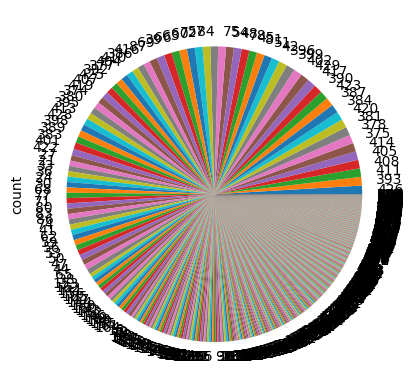

In [25]:
dftemp['LoanIdFormat'].value_counts().plot.pie()

In [35]:
import hashlib

string_to_encode = "0062x00000D9QbVAAV"
encoded_value = int(hashlib.sha256(string_to_encode.encode()).hexdigest(), 16)

print(encoded_value)


66924232150282037072804246810093999275483524042447097234589785961299500749412


In [39]:
blank = ""
for i in "0062x00000D9QbVAAV":
    if ((ord(i) >= 65 and ord(i) <= 90) or (ord(i) >= 97 and ord(i) <= 122)): 
        ascii_value = ord(i)
        blank += str(ascii_value)
    else:
        blank += str(i)
print(blank)

006212000000689819886656586


In [41]:
len("006212000000689819886656586")

27

In [60]:
# 0062x00000D9QbVAAV
# 0062x00000Db1bVAA
# 0062x00000DYbQ1bXVBA5A5
def decodeString(param):
    i=0
    blank = ""
    while i < len(param)-2:
        # singleDigitnum = int(str(param[i]))
        twoDigitnum = int(str(param[i])+str(param[i+1]))
        threeDigitnum = int(str(param[i])+str(param[i+1])+str(param[i+2]))
        if param[i] == "0":
            blank += str(param[i])
            i+=1
        elif ((twoDigitnum >= 65 and twoDigitnum <= 90) or (twoDigitnum >= 97 and twoDigitnum <= 99)):
            blank += chr(twoDigitnum)
            i+=2
        elif (threeDigitnum >= 100 and threeDigitnum <= 122):
            blank += chr(threeDigitnum)
            i+=3
        else:
            blank += str(param[i])
            i+=1
    return blank
intparam = "006212000000689819886656586"
print(decodeString(intparam))

0062x00000Db1bVAA


In [66]:
def decodeString(param):
    i = 0
    result = ""
    
    while i < len(param):
        if param[i] == '0':
            # Handling leading zeros
            result += '0'
            i += 1
        elif i + 2 < len(param) and param[i+1].isdigit() and param[i+2].isdigit():
            # Three-digit number
            three_digit_num = int(param[i:i+3])
            if 100 <= three_digit_num <= 122:
                result += chr(three_digit_num)
                i += 3
            else:
                result += param[i]
                i += 1
        elif i + 1 < len(param) and param[i+1].isdigit():
            # Two-digit number
            two_digit_num = int(param[i:i+2])
            if 65 <= two_digit_num <= 122:
                result += chr(two_digit_num)
                i += 2
            else:
                result += param[i]
                i += 1
        else:
            # Single digit or non-digit character
            result += param[i]
            i += 1
    
    return result

intparam = "006212000000689819886656586"
print(decodeString(intparam))


0062x000006898198866565V


In [21]:
df.shape

(20000, 14)

In [4]:
df.head()

,Contact__c,Min_IT_Loan_ID__c,Opp_Number__c,Id,AccountID,Number_Of_Loans_Granted__c,Num_Of_Loans_Paid__c,Purpose_of_Loan__c,Total_Repayments__c,Amount,Term_in_Weeks__c,Payment_Frequency__c,StageName
0,0032x00000d2Py7AAE,835652,4434431,0062x00000D2E3CAAV,0012x00000SIDYKAA5,10,4.0,Living Expenses,7,200,13.857,Fortnightly,Loan Paid
1,0032x00000bqYxSAAU,846129,4529720,0062x00000D8MwOAAV,0012x00000lIh7OAAS,4,0.0,Event - Holiday - Accommodation,3,500,6.571,Fortnightly,Loan Paid
2,0032x00000WjhLpAAJ,851865,4582822,0062x00000D9S6fAAF,0012x00000gmjS2AAI,4,0.0,One-off purchase,6,1200,6.143,Weekly,Loan Paid
3,0032x00000WjgarAAB,5149616,4581851,0062x00000D9QbVAAV,0012x00000gmie2AAA,5,0.0,Living Expenses,3,200,5.571,Fortnightly,Loan Paid
4,0032x00000WjgWaAAJ,851686,4581757,0062x00000D9QRzAAN,0012x00000gmiaiAAA,4,0.0,Wedding,2,700,7.143,Monthly,Loan Paid


In [6]:
df[df["Number_Of_Loans_Granted__c"]>10]

,Contact__c,Min_IT_Loan_ID__c,Opp_Number__c,Id,AccountID,Number_Of_Loans_Granted__c,Num_Of_Loans_Paid__c,Purpose_of_Loan__c,Total_Repayments__c,Amount,Term_in_Weeks__c,Payment_Frequency__c,StageName
85,0032x00000WjHkHAAV,5148689,4540960,0062x00000D8bAJAAZ,0012x00000gAXhpAAG,11,0.0,Living Expenses,3,200,5.571,Fortnightly,Loan Paid
1497,0032x00000U1vcRAAR,843655,4507293,0062x00000D7wReAAJ,0012x00000dbzMmAAI,12,5.0,Medical Expenses,5,300,10.000,Fortnightly,Loan Paid
1587,0032x00000U1DnVAAV,831751,4400020,0062x00000D1c1IAAR,0012x00000dAVT5AAO,13,6.0,Vehicle Expenses,16,5000,16.143,Weekly,Loan Paid
1588,0032x00000U1DnVAAV,838701,4464122,0062x00000D71SmAAJ,0012x00000dAVT5AAO,13,7.0,Medical Expenses,16,5000,15.857,Weekly,Loan Paid
1740,0032x00000TTY7BAAX,840683,4478475,0062x00000D7KD5AAN,0012x00000cKtUeAAK,15,6.0,Living Expenses,14,1000,13.714,Weekly,Loan Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19982,0032x000008IXMaAAO,825697,4352718,0062x00000D0nsXAAR,0012x00000BGiRMAA1,13,10.0,Furniture or Appliances,5,500,10.143,Fortnightly,Loan Paid
19983,0032x00000D4I9HAAV,5145345,4352715,0062x00000D0nsIAAR,0012x00000IORaOAAX,16,12.0,Relocation Expenses,3,500,5.143,Fortnightly,Loan Paid
19992,0032x00000G6i21AAB,825675,4352564,0062x00000D0nfxAAB,0012x00000MgomiAAB,13,8.0,Vehicle Expenses,7,1100,14.286,Fortnightly,Loan Paid
19993,0032x00000B5DFOAA3,825694,4352543,0062x00000D0neBAAR,0012x00000G2s2SAAR,36,29.0,Living Expenses,14,900,14.286,Weekly,Loan Paid


In [8]:
df.describe()

,Min_IT_Loan_ID__c,Opp_Number__c,Number_Of_Loans_Granted__c,Num_Of_Loans_Paid__c,Total_Repayments__c,Amount,Term_in_Weeks__c
count,2.000000e+04,2.000000e+04,20000.000000,12371.000000,20000.00000,20000.000000,20000.000000
mean,1.823345e+06,3.997611e+06,15.812900,8.208956,7.88540,983.552500,11.396368
std,1.859885e+06,1.565363e+06,15.148973,11.936401,5.02299,847.369758,5.624189
min,4.327220e+05,1.456594e+06,4.000000,0.000000,2.00000,100.000000,2.857000
25%,7.480642e+05,2.710266e+06,4.000000,1.000000,5.00000,400.000000,6.429000
50%,8.458510e+05,4.355417e+06,7.000000,2.000000,6.00000,600.000000,10.143000
75%,1.050980e+06,4.924300e+06,31.000000,10.000000,10.00000,1300.000000,14.143000
max,5.175861e+06,7.395202e+06,99.000000,71.000000,40.00000,5000.000000,66.857000


In [11]:
df["Num_Of_Loans_Paid__c"]/df["Number_Of_Loans_Granted__c"]

0        0.400000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
19995    0.400000
19996    0.333333
19997    0.500000
19998    0.777778
19999    0.400000
Length: 20000, dtype: float64

In [14]:
df["Ratings"]=(df["Num_Of_Loans_Paid__c"]/df["Number_Of_Loans_Granted__c"])


In [15]:
df.head(10)

,Contact__c,Min_IT_Loan_ID__c,Opp_Number__c,Id,AccountID,Number_Of_Loans_Granted__c,Num_Of_Loans_Paid__c,Purpose_of_Loan__c,Total_Repayments__c,Amount,Term_in_Weeks__c,Payment_Frequency__c,StageName,Ratings
0,0032x00000d2Py7AAE,835652,4434431,0062x00000D2E3CAAV,0012x00000SIDYKAA5,10,4.0,Living Expenses,7,200,13.857,Fortnightly,Loan Paid,0.4
1,0032x00000bqYxSAAU,846129,4529720,0062x00000D8MwOAAV,0012x00000lIh7OAAS,4,0.0,Event - Holiday - Accommodation,3,500,6.571,Fortnightly,Loan Paid,0.0
2,0032x00000WjhLpAAJ,851865,4582822,0062x00000D9S6fAAF,0012x00000gmjS2AAI,4,0.0,One-off purchase,6,1200,6.143,Weekly,Loan Paid,0.0
3,0032x00000WjgarAAB,5149616,4581851,0062x00000D9QbVAAV,0012x00000gmie2AAA,5,0.0,Living Expenses,3,200,5.571,Fortnightly,Loan Paid,0.0
4,0032x00000WjgWaAAJ,851686,4581757,0062x00000D9QRzAAN,0012x00000gmiaiAAA,4,0.0,Wedding,2,700,7.143,Monthly,Loan Paid,0.0
5,0032x00000WjgLFAAZ,851655,4581639,0062x00000D9Q9oAAF,0012x00000gmiWBAAY,5,0.0,Medical Bill,2,1000,7.000,Monthly,Loan Paid,0.0
6,0032x00000Wjg6NAAR,851588,4581146,0062x00000D9PbUAAV,0012x00000gmiD5AAI,4,0.0,Vehicle Expense,6,700,6.286,Weekly,Loan Paid,0.0
7,0032x00000Wjg0fAAB,851540,4581105,0062x00000D9PUKAA3,0012x00000gmi6kAAA,4,0.0,Living Expenses,6,300,6.286,Weekly,Loan Paid,0.0
8,0032x00000Wjfw6AAB,851511,4580929,0062x00000D9PJLAA3,0012x00000gmi2yAAA,4,0.0,Vehicle - Registration,6,1200,6.714,Weekly,Loan Paid,0.0
9,0032x00000WjfqXAAR,851600,4580766,0062x00000D9P67AAF,0012x00000gmhyUAAQ,4,0.0,House furniture,6,500,6.286,Weekly,Loan Paid,0.0


In [20]:
set(df.Payment_Frequency__c)

{'Fortnightly', 'Monthly', 'Weekly'}

In [18]:
df.columns

Index(['Contact__c', 'Min_IT_Loan_ID__c', 'Opp_Number__c', 'Id', 'AccountID',
       'Number_Of_Loans_Granted__c', 'Num_Of_Loans_Paid__c',
       'Purpose_of_Loan__c', 'Total_Repayments__c', 'Amount',
       'Term_in_Weeks__c', 'Payment_Frequency__c', 'StageName', 'Ratings'],
      dtype='object')

In [16]:
df.describe()

,Min_IT_Loan_ID__c,Opp_Number__c,Number_Of_Loans_Granted__c,Num_Of_Loans_Paid__c,Total_Repayments__c,Amount,Term_in_Weeks__c,Ratings
count,2.000000e+04,2.000000e+04,20000.000000,12371.000000,20000.00000,20000.000000,20000.000000,12371.000000
mean,1.823345e+06,3.997611e+06,15.812900,8.208956,7.88540,983.552500,11.396368,0.442908
std,1.859885e+06,1.565363e+06,15.148973,11.936401,5.02299,847.369758,5.624189,0.348533
min,4.327220e+05,1.456594e+06,4.000000,0.000000,2.00000,100.000000,2.857000,0.000000
25%,7.480642e+05,2.710266e+06,4.000000,1.000000,5.00000,400.000000,6.429000,0.166667
50%,8.458510e+05,4.355417e+06,7.000000,2.000000,6.00000,600.000000,10.143000,0.400000
75%,1.050980e+06,4.924300e+06,31.000000,10.000000,10.00000,1300.000000,14.143000,0.818182
max,5.175861e+06,7.395202e+06,99.000000,71.000000,40.00000,5000.000000,66.857000,0.980769


In [ ]:
We have to look at the data of users and all the loans that they have taken to form loan products as range bound loans.
     For e.g.
            $100 - $500 / loan type / 2 weeks - 3 weeks repayment cycle (weekly/monthly etc) / up to 3 repayment instalments / Interest Rate/ 
            Overall Duration of under 2-6 weeks can be all put in a basket of Loan Product ID-1 & likewise
            $500 - $750 / loan type / 5 weeks - 7 weeks repayment cycle (weekly/monthly etc) / up to 3 repayment instalments / Interest Rate/ 
            Overall Duration of between 7-11 weeks can be all put in a basket of Loan Product ID-2

In [ ]:
['Id', 'AccountID', 'Number_Of_Loans_Granted__c', 'Num_Of_Loans_Paid__c',
       'Purpose_of_Loan__c', 'Total_Repayments__c', 'Amount',
       'Term_in_Weeks__c', 'Payment_Frequency__c', 'StageName', 'Ratings']

In [17]:
# df.to_csv("Loan_rate.csv")

In [10]:
account_ID_VC = df.AccountID.value_counts()

In [15]:
account_ID_VC.head(50)

0012x000005TO9PAAW    50
0010K00001fghU0QAI    40
0010K000023NSo2QAG    40
0012x000003Cez4AAC    34
0010K00001cAVTUQA4    33
0012x00000G2s2SAAR    33
0012x000003EuYaAAK    31
0010K000026N8lUQAS    30
0010K000022ihcKQAQ    29
0012x000003EkGYAA0    28
0010K00001mfv0DQAQ    28
0012x000005S4JMAA0    28
0010K000022OKutQAG    27
0010K0000241nCXQAY    27
0012x000002bt3bAAA    27
0010K000023NmY9QAK    27
0010K000029H14BQAS    27
0012x000002b3iLAAQ    27
0012x000003CzbNAAS    27
0012x00000FEwhuAAD    27
0010K000023NWslQAG    27
0010K000027ziExQAI    26
0010K0000242mNcQAI    26
0010K000028glJ1QAI    26
0010K0000281OdeQAE    26
0010K00001g7iB1QAI    26
0010K000022jygUQAQ    26
0010K00002COEtKQAX    26
0012800001Z5quwAAB    26
0010K000020HvEmQAK    25
0010K00001y2gvTQAQ    25
0010K000026M2seQAC    25
0010K000028gl5FQAQ    25
0010K000027z9WPQAY    24
0010K000020H0ozQAC    24
0012800001SDTvOAAX    24
0010K000021FKeWQAW    24
0010K000023NYjRQAW    23
0010K000021FMw7QAG    23
0010K000022pF7xQAE    23


In [16]:
StageName_VC = df.StageName.value_counts()

In [17]:
StageName_VC

Loan Paid    20000
Name: StageName, dtype: int64

In [19]:
id_VC = df.Id.value_counts()

In [21]:
id_VC.head(50)

0062x00000FI9Z6AAL    2
0062x00000FH6YJAA1    2
0062x00000ExRVFAA3    2
0062x00000D16DoAAJ    2
0062x00000ExkFRAAZ    2
0062x00000D1CBoAAN    2
0062x00000D19iiAAB    2
0062x00000F485RAAR    2
0062x00000D175FAAR    2
0062x00000EzKR5AAN    2
0062x00000EeCT8AAN    2
0062x00000EeLUaAAN    2
0062x00000F2DLnAAN    2
0062x00000EzN2XAAV    2
0062x00000D0wOWAAZ    2
0062x00000D0s5fAAB    2
0062x00000EeH0aAAF    2
0062x00000D116DAAR    2
0062x00000FKA5gAAH    2
0062x00000ExvjkAAB    2
0062x00000FH4sVAAT    2
0062x00000EwuAzAAJ    2
0062x00000EzmaBAAR    2
0062x00000EdwNdAAJ    2
0062x00000ExuDdAAJ    2
0062x00000D16MoAAJ    2
0062x00000D19ajAAB    2
0062x00000FIFsTAAX    2
0062x00000F2XtwAAF    2
0062x00000D161WAAR    2
0062x00000D0yLyAAJ    2
0062x00000FHRtfAAH    2
0062x00000D1EK7AAN    2
0062x00000D0oOjAAJ    2
0062x00000D162yAAB    2
0062x00000D1EZ7AAN    2
0062x00000F2TKYAA3    2
0062x00000D0uwbAAB    2
0062x00000EwhE1AAJ    2
0062x00000D1FrqAAF    2
0062x00000F2yvRAAR    2
0062x00000D0yt2A

In [22]:
id_VC.tail(50)

0062x00000F4NEJAA3    1
0062x00000DWSu8AAH    1
0062x00000Bpt1dAAB    1
0062x00000D1T3SAAV    1
0062x00000Cia5QAAR    1
0062x00000AHFpXAAX    1
0062x000007a8NYAAY    1
0062x00000AfipiAAB    1
0062x00000Dri2AAAR    1
0062x00000D6vVKAAZ    1
0062x00000AkBZnAAN    1
0062x0000070aN9AAI    1
0062x00000DUcC2AAL    1
0062x00000ECEfqAAH    1
0062x00000DZfkDAAT    1
0062x00000EDPwOAAX    1
0062x00000DsxBpAAJ    1
0062x00000AkBMQAA3    1
0062x00000An8wmAAB    1
0062x00000DGUctAAH    1
0062x00000D0nsXAAR    1
0062x00000EOU7xAAH    1
0062x00000ANyBGAA1    1
0062x00000D0VFSAA3    1
0062x00000EeaUUAAZ    1
0062x00000AnCpUAAV    1
0062x00000BCE7RAAX    1
0062x00000D7ov4AAB    1
0062x00000D1FPTAA3    1
0062x00000AYe9NAAT    1
0062x00000D15PTAAZ    1
0062x00000CjoykAAB    1
0062x00000EzUQCAA3    1
0062x00000BJhWpAAL    1
0062x00000DZ34fAAD    1
0062x00000DWaIvAAL    1
0062x000007ZeqCAAS    1
0062x000009GMfNAAW    1
0062x00000ExvokAAB    1
0062x000009V3dRAAS    1
0062x00000D1DSuAAN    1
0062x000009TUAsA

In [24]:
id_VC.shape

(19544,)

In [25]:
df.columns

Index(['Contact__c', 'Min_IT_Loan_ID__c', 'Opp_Number__c', 'Id', 'AccountID',
       'Number_Of_Loans_Granted__c', 'Num_Of_Loans_Paid__c',
       'Purpose_of_Loan__c', 'Total_Repayments__c', 'Amount',
       'Term_in_Weeks__c', 'Payment_Frequency__c', 'StageName'],
      dtype='object')

In [30]:
result = df.groupby('Total_Repayments__c').apply(lambda group: group[group['Amount'].isin([100, 150, 200])])

In [33]:
result = result.reset_index(drop=True)


In [34]:
result.head(50)

,Contact__c,Min_IT_Loan_ID__c,Opp_Number__c,Id,AccountID,Number_Of_Loans_Granted__c,Num_Of_Loans_Paid__c,Purpose_of_Loan__c,Total_Repayments__c,Amount,Term_in_Weeks__c,Payment_Frequency__c,StageName
0,0032x00000WGDJDAA5,839207,4468426,0062x00000D77a0AAB,0012x00000fnHE1AAM,6,1.0,Living Expenses,2,200,8.714,Monthly,Loan Paid
1,0032x00000TCDrbAAH,5146574,4426000,0062x00000D24XaAAJ,0012x00000cyLS7AAM,4,2.0,Living Expenses,2,200,5.857,Monthly,Loan Paid
2,0032x00000XZQkzAAH,909330,5073759,0062x00000DZ6vqAAD,0012x00000hXzotAAC,4,0.0,Living Expenses,2,200,4.286,Fortnightly,Loan Paid
3,0032x00000U2lU5AAJ,5136820,3907481,0062x00000CSlOKAA1,0012x00000dx48NAAQ,4,0.0,Living Expenses,2,200,7.286,Monthly,Loan Paid
4,0032x00000N93ljAAB,633416,2756781,0062x00000AeY5tAAF,0012x00000TtuGPAAZ,5,NaN,Living Expenses,2,200,5.143,Monthly,Loan Paid
5,0032x00000N7AexAAF,5107240,2699662,0062x00000Acmt8AAB,0012x00000TskD6AAJ,6,NaN,Living Expenses,2,200,6.143,Monthly,Loan Paid
6,0032x00000MgmSAAAZ,631924,2740257,0062x00000Ae2fcAAB,0012x00000TrUycAAF,4,NaN,Living Expenses,2,200,6.000,Monthly,Loan Paid
7,0032x00000MfcbOAAR,5104985,2636385,0062x00000AMLCrAAP,0012x00000TInTPAA1,6,NaN,Living Expenses,2,200,6.857,Monthly,Loan Paid
8,0032x00000MdwS0AAJ,638429,2781766,0062x00000AfG50AAF,0012x00000THKQYAA5,5,NaN,Living Expenses,2,200,2.857,Fortnightly,Loan Paid
9,0032x00000MdmlVAAR,5103511,2598867,0062x00000ALCrbAAH,0012x00000THAedAAH,4,NaN,Home Maintenance & Repairs,2,200,8.857,Monthly,Loan Paid


In [47]:
result[result['Total_Repayments__c']==5].head(50)  #.to_csv("condition_TRC.csv")

,Contact__c,Min_IT_Loan_ID__c,Opp_Number__c,Id,AccountID,Number_Of_Loans_Granted__c,Num_Of_Loans_Paid__c,Purpose_of_Loan__c,Total_Repayments__c,Amount,Term_in_Weeks__c,Payment_Frequency__c,StageName
833,0032x00000WjMyxAAF,5148881,4549148,0062x00000D8lx2AAB,0012x00000gAddzAAC,4,0.0,Living Expenses,5,200,9.000,Fortnightly,Loan Paid
834,0032x00000WHzH4AAL,841346,4485503,0062x00000D7T1TAAV,0012x00000g8czpAAA,5,1.0,Vehicle Expenses,5,200,9.429,Fortnightly,Loan Paid
835,0032x00000WHZxYAAX,850440,4569911,0062x00000D9C2RAAV,0012x00000g8ErcAAE,5,1.0,Medical Expenses,5,200,9.714,Fortnightly,Loan Paid
836,0032x00000WHIrSAAX,849599,4562909,0062x00000D93ztAAB,0012x00000g7yTxAAI,4,1.0,Living Expenses,5,200,9.857,Fortnightly,Loan Paid
837,0032x00000WH4iOAAT,850696,4568360,0062x00000D9AYfAAN,0012x00000g7mCCAAY,4,1.0,Medical Expenses,5,200,9.857,Fortnightly,Loan Paid
838,0032x00000WH0n8AAD,849567,4562853,0062x00000D93vmAAB,0012x00000g7iFYAAY,4,1.0,Living Expenses,5,200,8.857,Fortnightly,Loan Paid
839,0032x00000WGeXTAA1,846237,4532223,0062x00000D8Pw2AAF,0012x00000g6ZHPAA2,4,1.0,Child Expenses,5,200,9.143,Fortnightly,Loan Paid
840,0032x00000WGdsqAAD,849467,4562147,0062x00000D92w5AAB,0012x00000fphN5AAI,5,1.0,Vehicle Expenses,5,200,8.714,Fortnightly,Loan Paid
841,0032x00000WGSHLAA5,843957,4508518,0062x00000D7yEcAAJ,0012x00000foRyXAAU,4,1.0,Living Expenses,5,200,9.143,Fortnightly,Loan Paid
842,0032x00000WGM7UAAX,846519,4533973,0062x00000D8SLEAA3,0012x00000fnzNzAAI,4,1.0,Medical Expenses,5,200,9.714,Fortnightly,Loan Paid
